### Training of modified U-Net for Optic Disc on DRISHTI-GS database (cross-validation fold #0).

In [1]:
%load_ext autoreload
%autoreload 2

import tensorflow as tf
import matplotlib.pyplot as plt
import h5py

from model import *
from process_images import *
from process_result import *

print('Keras version:', keras.__version__)
print('TensorFlow version:', tf.__version__)

Keras version: 2.5.0
TensorFlow version: 2.5.0


#### DRISHTI-GS

Carrega imagens de treino e teste com tamanho 512px.

In [2]:
h5f = h5py.File(os.path.join(os.path.dirname(os.getcwd()), 'data', 'hdf5_datasets', 'DRISHTI_GS.hdf5'), 'r')
#------------------------------------------------------------------------------------------------------------
img_train = h5f['DRISHTI-GS/512 px/images']
cup_train = h5f['DRISHTI-GS/512 px/cup']
disc_train = h5f['DRISHTI-GS/512 px/disc']
disc_locations = h5f['DRISHTI-GS/512 px/disc_locations']

img_test = h5f['DRISHTI-GS-test/512 px/images']
cup_test = h5f['DRISHTI-GS-test/512 px/cup']
disc_test = h5f['DRISHTI-GS-test/512 px/disc']
disc_locations_test = h5f['DRISHTI-GS-test/512 px/disc_locations']

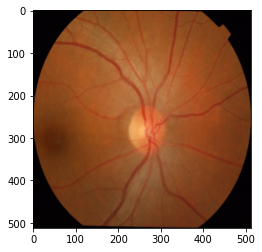

(<HDF5 dataset "images": shape (50, 512, 512, 3), type "|u1">,
 <HDF5 dataset "cup": shape (50, 512, 512, 1), type "|u1">,
 <HDF5 dataset "disc": shape (50, 512, 512, 1), type "|u1">,
 <HDF5 dataset "disc_locations": shape (50, 4), type "<i8">)

(50, 512, 512, 3)


In [3]:
plt.imshow(img_train[45])
plt.show()
print(img_train.shape)
img_train, cup_train, disc_train, disc_locations

### Train images

In [4]:
green_channel_train = get_color_channel(1, img_train)
len(green_channel_train)

50

### Test images

In [5]:
green_channel_test = get_color_channel(1, img_test)
len(green_channel_test)

51

#### Generator of augmented data:

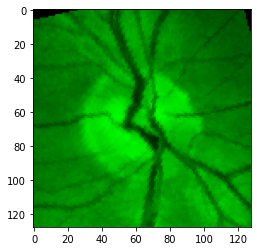

In [6]:
gen = data_generator(green_channel_train, cup_train, disc_locations, 128, 'train', batch_size=1)
batch = next(gen)

plt.imshow(np.squeeze(batch[0][0]))

In [7]:
img_size = IMG_SIZE

X_test, Y_test = next(data_generator(green_channel_test, cup_test, disc_locations_test, img_size, train_or_test='test', batch_size=100, stationary=True))
len(X_test), len(Y_test)

(51, 51)

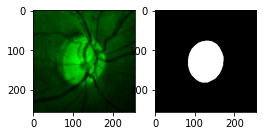

In [8]:
fig = plt.figure(figsize=(4, 4))
ax = fig.add_subplot(1, 2, 1)
ax.imshow(np.squeeze(X_test[10]), cmap=plt.cm.Greys_r)
ax = fig.add_subplot(1, 2, 2)
ax.imshow(np.squeeze(Y_test[10]), cmap=plt.cm.Greys_r)
plt.show()

### Training and test cup

In [9]:
epochs = NUM_EPOCHS
spe = SPE
model = create_compile_model(img_size)
history_cup = train(green_channel_train, 
                    cup_train, 
                    disc_locations, 
                    'cup_green', 
                    model, 
                    epochs, X_test, Y_test, img_size, spe)

3/3 [==============================] - 14s 5s/step - loss: 1.5221 - mean_IOU_gpu: 0.0736 - dice_metric: 0.1364 - val_loss: 1.4546 - val_mean_IOU_gpu: 0.0752 - val_dice_metric: 0.1388


### Visual check

image #0


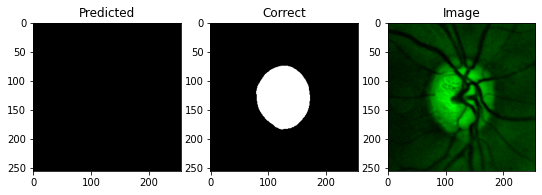

IOU: 0.119171142578125
Dice: 0.21296321544460503
image #1


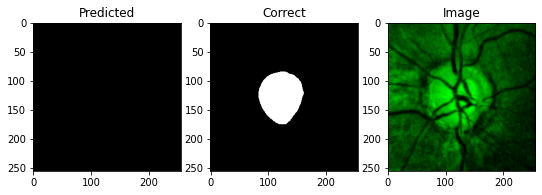

IOU: 0.080169677734375
Dice: 0.14843904506286199
image #2


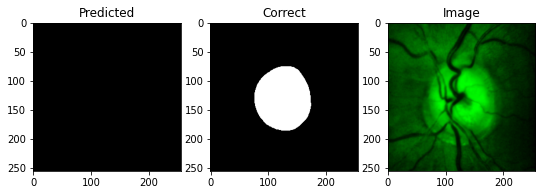

IOU: 0.130340576171875
Dice: 0.23062177704581657
image #3


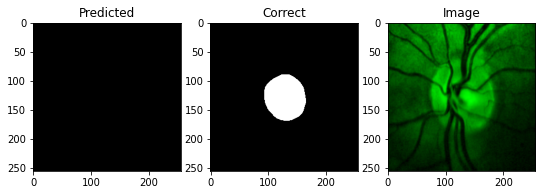

IOU: 0.0688018798828125
Dice: 0.12874580626739954
image #4


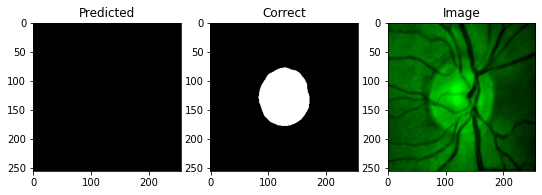

IOU: 0.10498046875
Dice: 0.19001325673884226
image #5


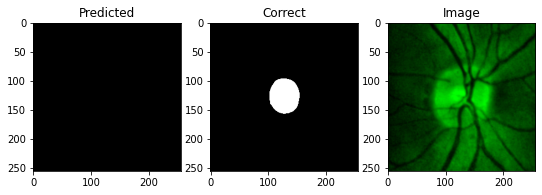

IOU: 0.0387725830078125
Dice: 0.07465076310648236
image #6


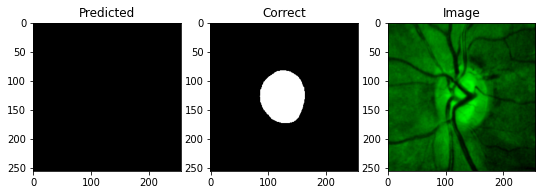

IOU: 0.084381103515625
Dice: 0.15562997776714604
image #7


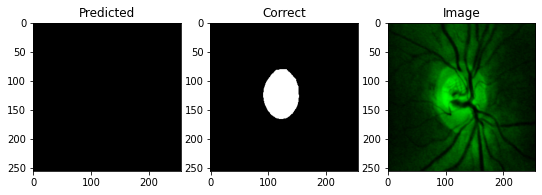

IOU: 0.0626220703125
Dice: 0.11786329695577255
image #8


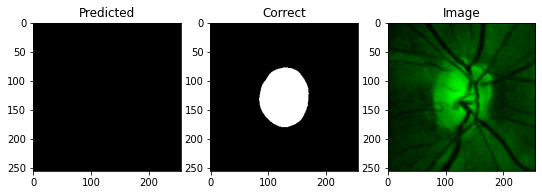

IOU: 0.1042938232421875
Dice: 0.18888781417971287
image #9


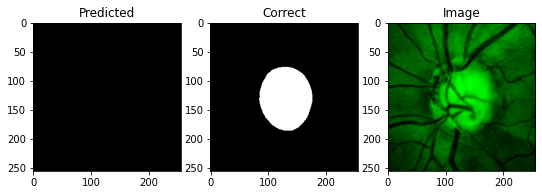

IOU: 0.1201629638671875
Dice: 0.21454550407977005
image #10


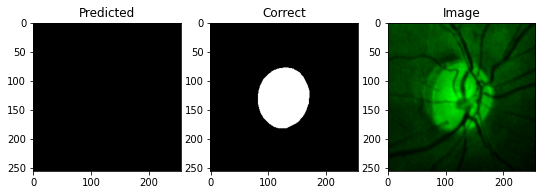

IOU: 0.11175537109375
Dice: 0.2010430963491628
image #11


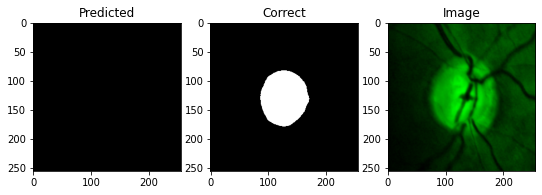

IOU: 0.0946807861328125
Dice: 0.172983370736399
image #12


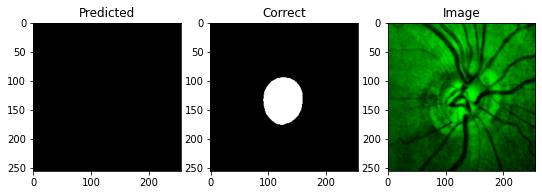

IOU: 0.066986083984375
Dice: 0.12556130766810628
image #13


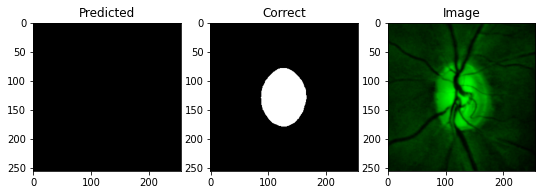

IOU: 0.09234619140625
Dice: 0.1690786165279097
image #14


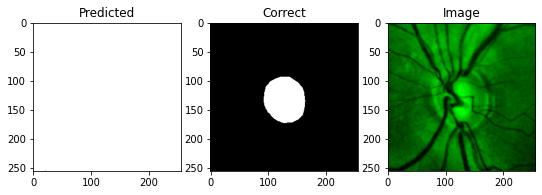

IOU: 0.06950484216213226
Dice: 0.12997574547010987
image #15


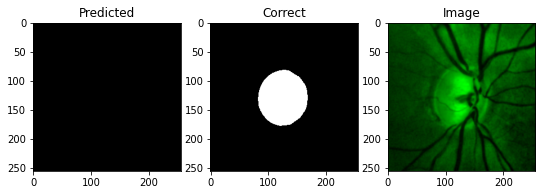

IOU: 0.098052978515625
Dice: 0.17859425808065368
image #16


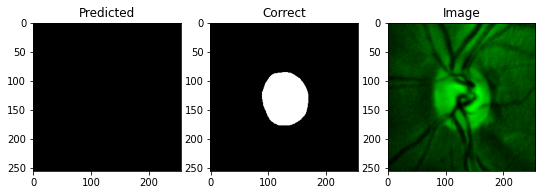

IOU: 0.08978271484375
Dice: 0.16477177261271353
image #17


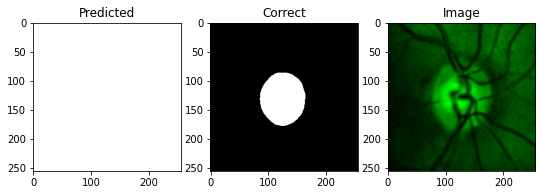

IOU: 0.08607614040374756
Dice: 0.15850848600651904
image #18


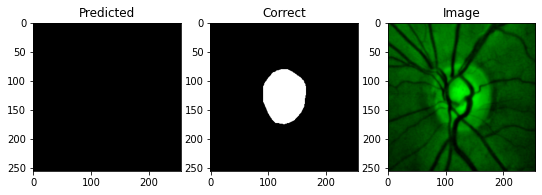

IOU: 0.0840301513671875
Dice: 0.15503286741832412
image #19


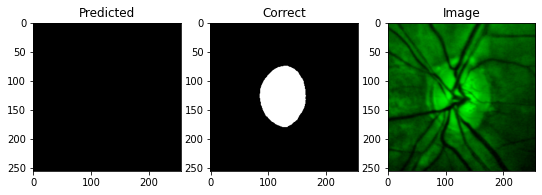

IOU: 0.0977325439453125
Dice: 0.17806257905783907
image #20


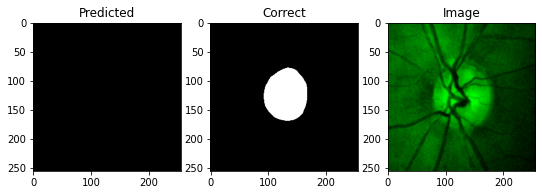

IOU: 0.0821380615234375
Dice: 0.15180699107432422
image #21


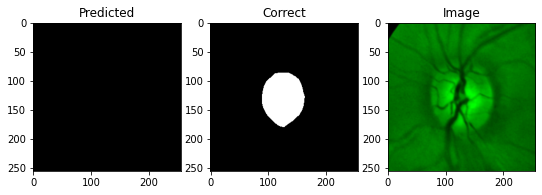

IOU: 0.08001708984375
Dice: 0.14817745125741735
image #22


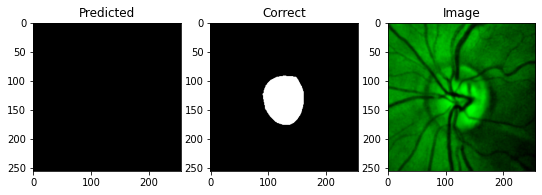

IOU: 0.07293701171875
Dice: 0.13595767677342283
image #23


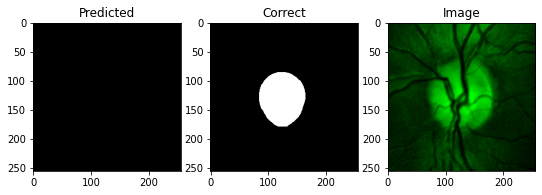

IOU: 0.0889434814453125
Dice: 0.1633573880753871
image #24


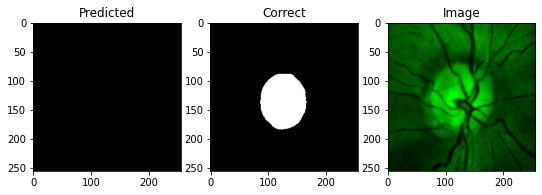

IOU: 0.092193603515625
Dice: 0.16882282265500573
image #25


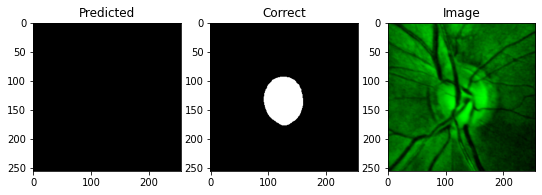

IOU: 0.0675201416015625
Dice: 0.12649904947041923
image #26


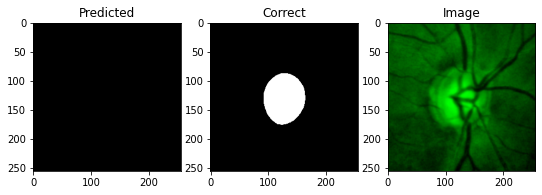

IOU: 0.0757904052734375
Dice: 0.14090180559692494
image #27


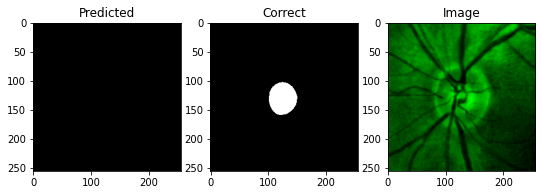

IOU: 0.0327301025390625
Dice: 0.06338558827440494
image #28


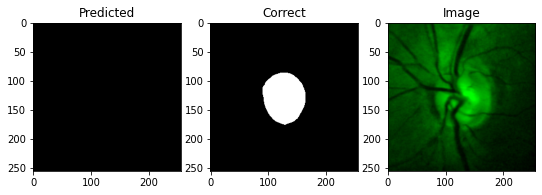

IOU: 0.0778656005859375
Dice: 0.14448109401322215
image #29


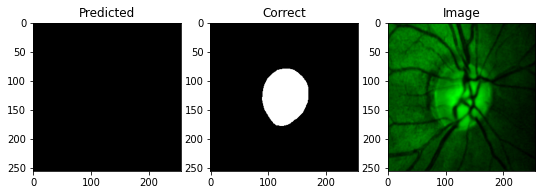

IOU: 0.0930023193359375
Dice: 0.17017771635185883
image #30


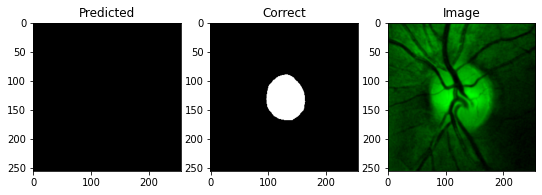

IOU: 0.0626220703125
Dice: 0.11786329695577255
image #31


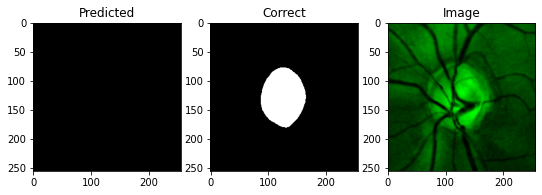

IOU: 0.0918426513671875
Dice: 0.16823422542100483
image #32


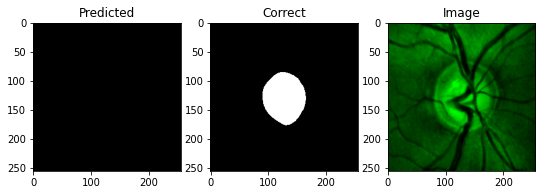

IOU: 0.0784149169921875
Dice: 0.14542624690484612
image #33


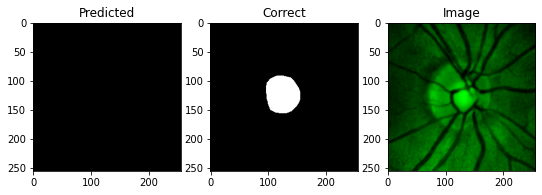

IOU: 0.047760009765625
Dice: 0.09116593364984125
image #34


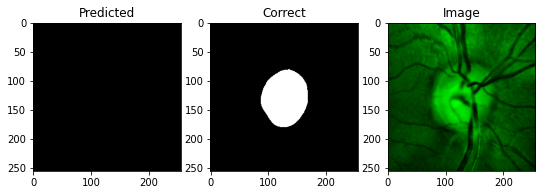

IOU: 0.09393310546875
Dice: 0.17173464263795124
image #35


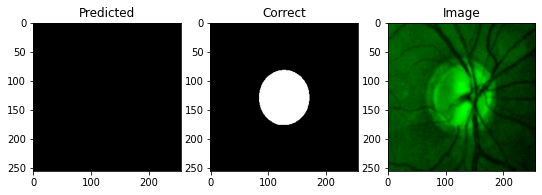

IOU: 0.099761962890625
Dice: 0.18142464689069568
image #36


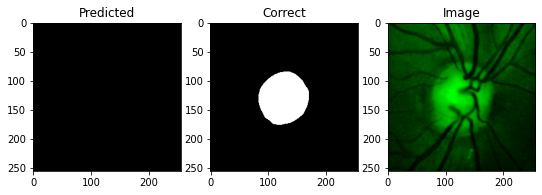

IOU: 0.09393310546875
Dice: 0.17173464263795124
image #37


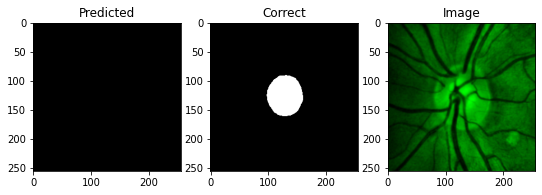

IOU: 0.0526275634765625
Dice: 0.09999275204754657
image #38


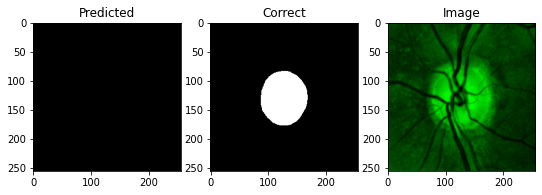

IOU: 0.091461181640625
Dice: 0.16759401649657488
image #39


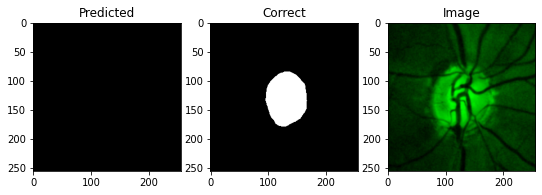

IOU: 0.079620361328125
Dice: 0.1474969613025412
image #40


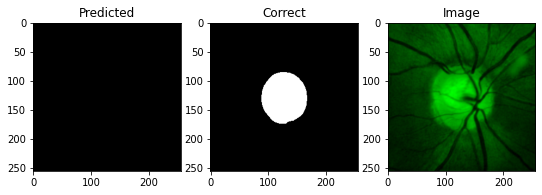

IOU: 0.0839080810546875
Dice: 0.1548250862251003
image #41


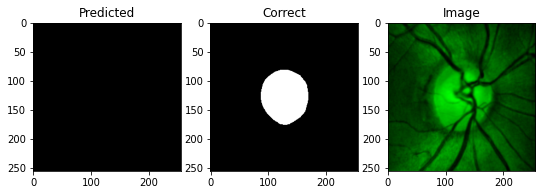

IOU: 0.0921478271484375
Dice: 0.1687460705553615
image #42


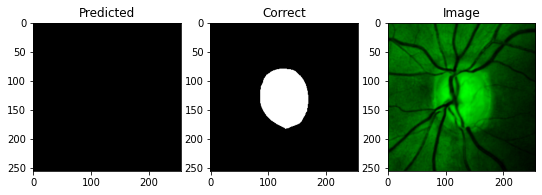

IOU: 0.1030731201171875
Dice: 0.18688356780235438
image #43


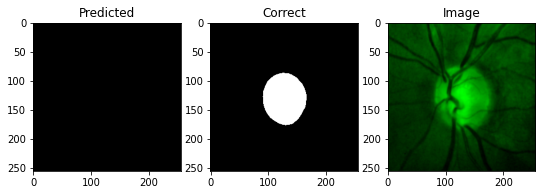

IOU: 0.0802001953125
Dice: 0.1484913549553622
image #44


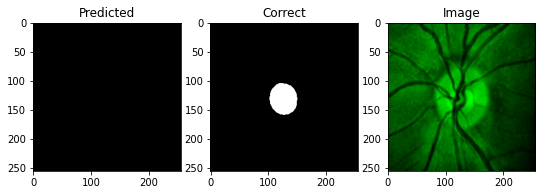

IOU: 0.031494140625
Dice: 0.06106508875739645
image #45


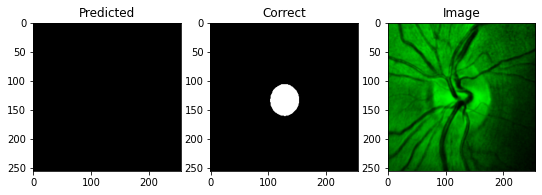

IOU: 0.0325927734375
Dice: 0.06312802931788628
image #46


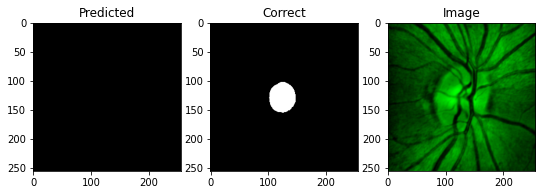

IOU: 0.0288238525390625
Dice: 0.05603262884686689
image #47


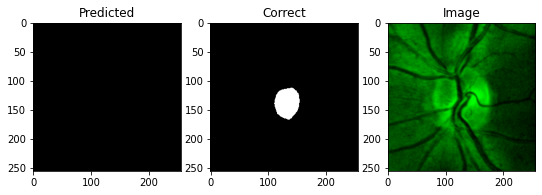

IOU: 0.0277862548828125
Dice: 0.05407010407233101
image #48


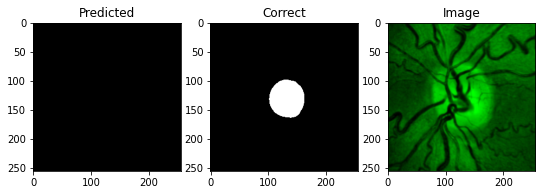

IOU: 0.048187255859375
Dice: 0.09194398346289341
image #49


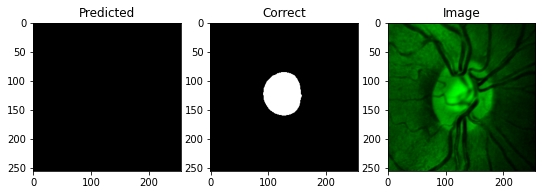

IOU: 0.0594635009765625
Dice: 0.11225209914593925
image #50


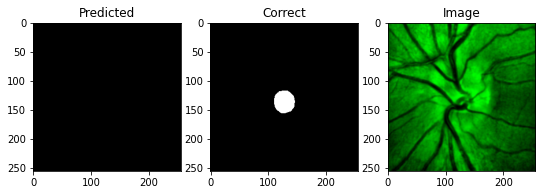

IOU: 0.0171661376953125
Dice: 0.033752868993864475


In [10]:
pred_iou, pred_dice, pred_cup = predict(green_channel_test, X_test, Y_test, model, img_size)

In [11]:
print(np.mean(pred_iou))
print(np.mean(pred_dice))

0.077737294
0.14320388994507088


Acquiring scores for the validation set:

### Training and Test disc

In [12]:
X_test, Z_test = next(data_generator(green_channel_test, disc_test, disc_locations_test, img_size, train_or_test='test', batch_size=100, stationary=True))

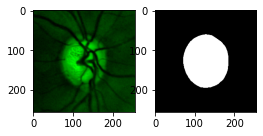

In [13]:
num = 1
for i in range(num):
    fig = plt.figure(figsize=(4, 4))
    ax = fig.add_subplot(1, 2, 1)
    ax.imshow(np.squeeze(X_test[i]), cmap=plt.cm.Greys_r)
    ax = fig.add_subplot(1, 2, 2)
    ax.imshow(np.squeeze(Z_test[i]), cmap=plt.cm.Greys_r)
    plt.show()
    print('=========================')

In [14]:
history_disc = train(green_channel_train, 
                     disc_train, 
                     disc_locations, 
                     'disc_green', 
                     model, epochs, X_test, Z_test, img_size, spe)

3/3 [==============================] - 10s 4s/step - loss: 1.0395 - mean_IOU_gpu: 0.1413 - dice_metric: 0.2472 - val_loss: 0.9935 - val_mean_IOU_gpu: 0.1442 - val_dice_metric: 0.2518


image #0


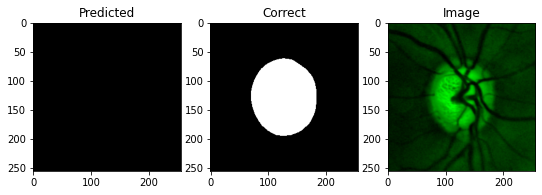

IOU: 0.1815338134765625
Dice: 0.30728500768406236
image #1


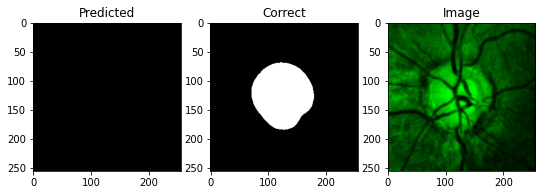

IOU: 0.1418304443359375
Dice: 0.24842645427697077
image #2


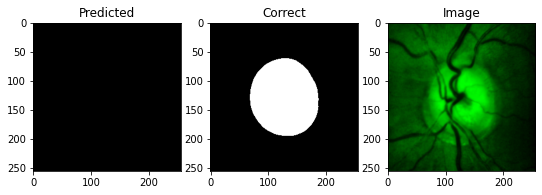

IOU: 0.191619873046875
Dice: 0.32161241580659206
image #3


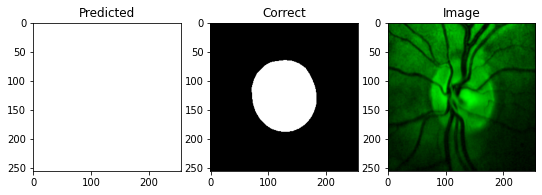

IOU: 0.16781872510910034
Dice: 0.2874054329504919
image #4


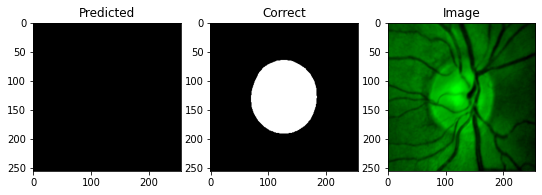

IOU: 0.1737518310546875
Dice: 0.29606229606229606
image #5


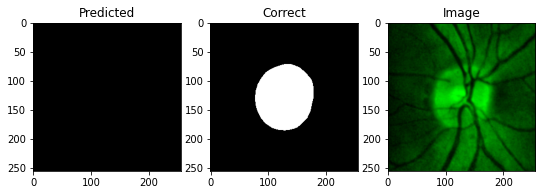

IOU: 0.13934326171875
Dice: 0.24460277495044733
image #6


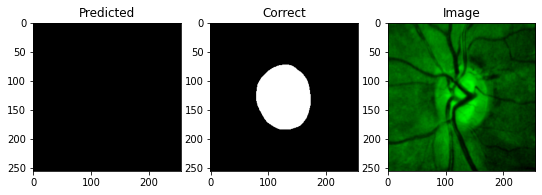

IOU: 0.12725830078125
Dice: 0.22578374573609833
image #7


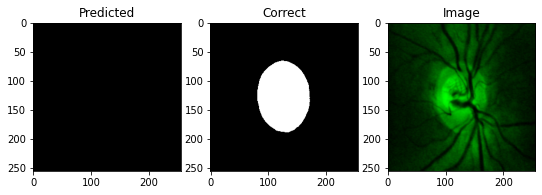

IOU: 0.1334991455078125
Dice: 0.23555226492562428
image #8


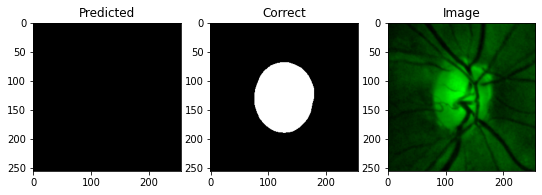

IOU: 0.1508026123046875
Dice: 0.2620824991050001
image #9


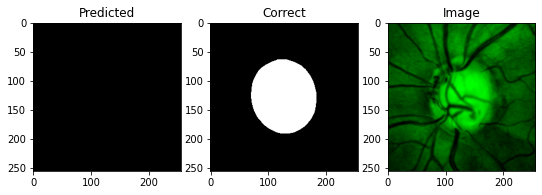

IOU: 0.1740570068359375
Dice: 0.2965052051518657
image #10


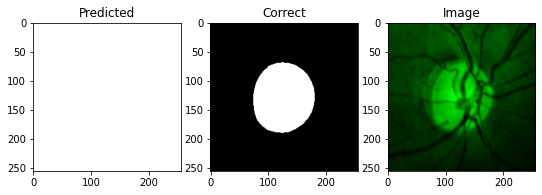

IOU: 0.15643548965454102
Dice: 0.27054771926583715
image #11


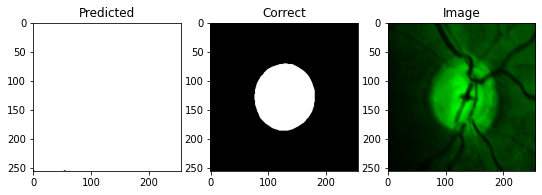

IOU: 0.14466233551502228
Dice: 0.25275985280785024
image #12


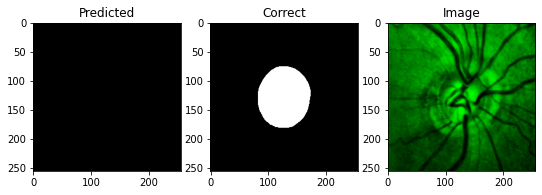

IOU: 0.1169281005859375
Dice: 0.20937444500607932
image #13


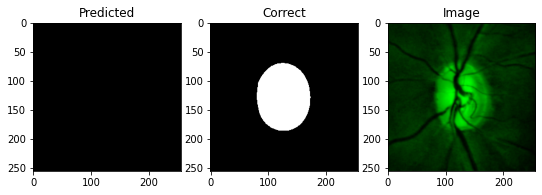

IOU: 0.1319580078125
Dice: 0.23315000539199826
image #14


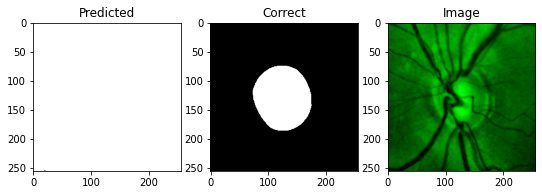

IOU: 0.13460394740104675
Dice: 0.23727035532721844
image #15


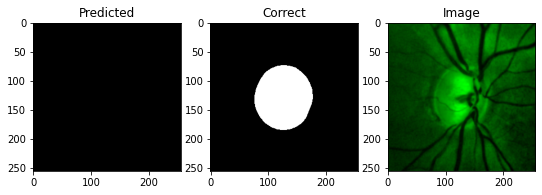

IOU: 0.134124755859375
Dice: 0.23652557651427494
image #16


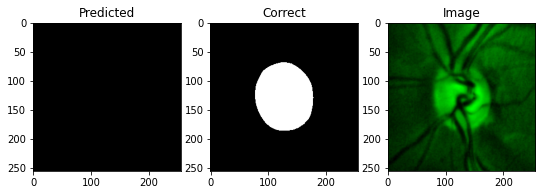

IOU: 0.1442108154296875
Dice: 0.2520703588622028
image #17


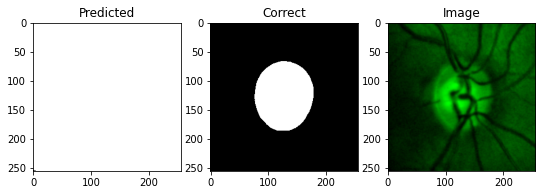

IOU: 0.14691205322742462
Dice: 0.25618713076800254
image #18


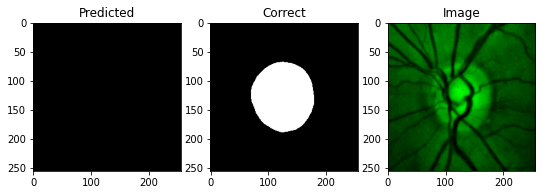

IOU: 0.1568450927734375
Dice: 0.2711600606740091
image #19


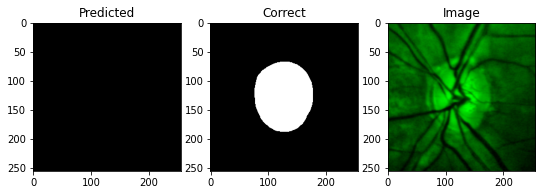

IOU: 0.1494140625
Dice: 0.2599830076465591
image #20


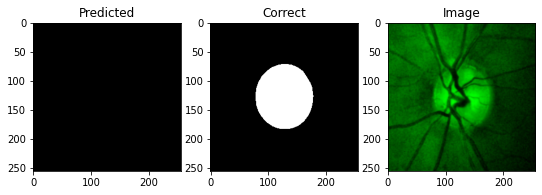

IOU: 0.1345062255859375
Dice: 0.2371185323667469
image #21


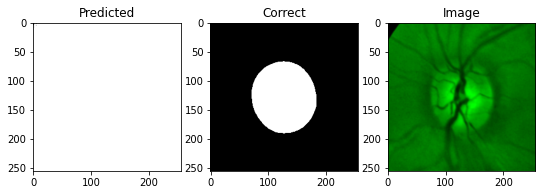

IOU: 0.16702531278133392
Dice: 0.2862411236219546
image #22


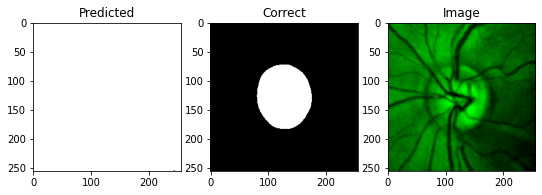

IOU: 0.1271725744009018
Dice: 0.2256488012238212
image #23


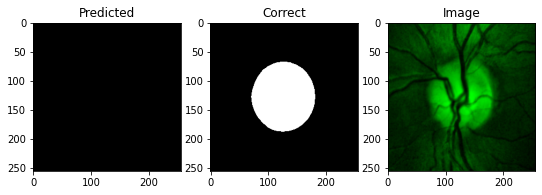

IOU: 0.1582794189453125
Dice: 0.27330092610889356
image #24


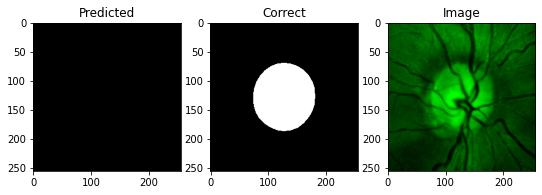

IOU: 0.1514434814453125
Dice: 0.2630497873073508
image #25


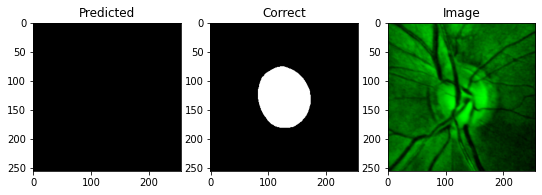

IOU: 0.1148834228515625
Dice: 0.20609046739204817
image #26


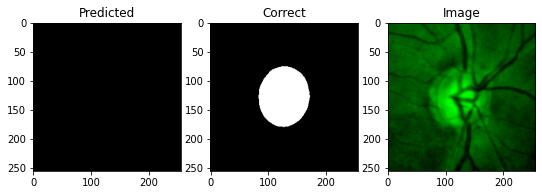

IOU: 0.1101531982421875
Dice: 0.19844684214143357
image #27


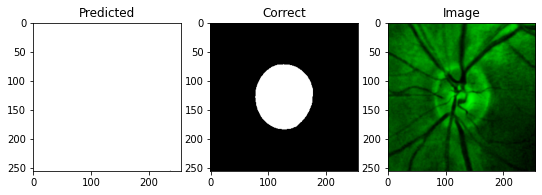

IOU: 0.13395895063877106
Dice: 0.2362677288263315
image #28


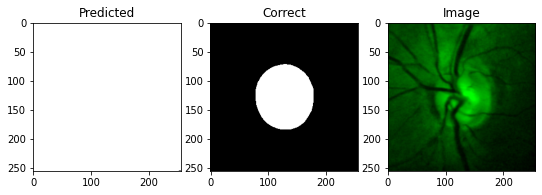

IOU: 0.13747482001781464
Dice: 0.24171932225218337
image #29


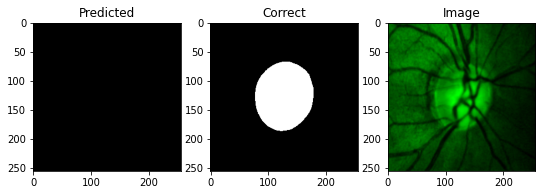

IOU: 0.1446685791015625
Dice: 0.2527693722756175
image #30


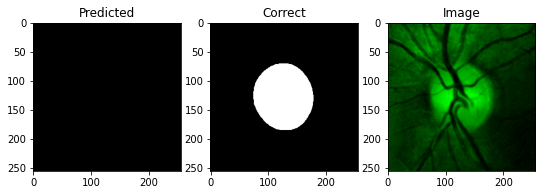

IOU: 0.14306640625
Dice: 0.25032037590773176
image #31


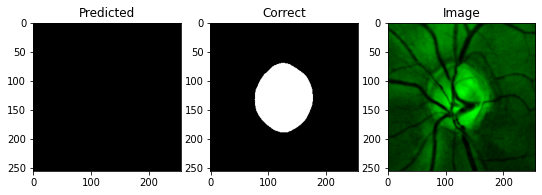

IOU: 0.138885498046875
Dice: 0.243897210536188
image #32


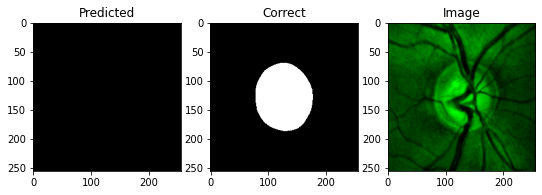

IOU: 0.1404571533203125
Dice: 0.24631728234837638
image #33


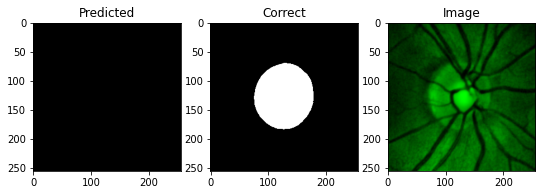

IOU: 0.1397247314453125
Dice: 0.2451903123451997
image #34


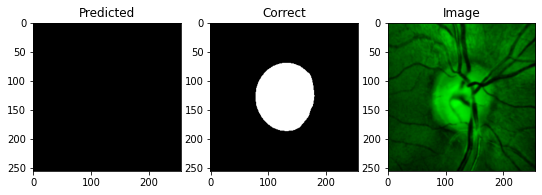

IOU: 0.1438751220703125
Dice: 0.2515573934502768
image #35


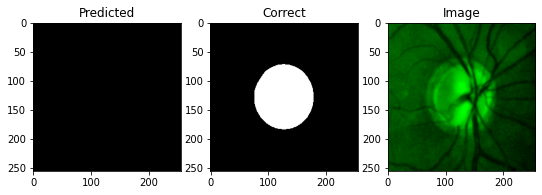

IOU: 0.13787841796875
Dice: 0.24234297055194978
image #36


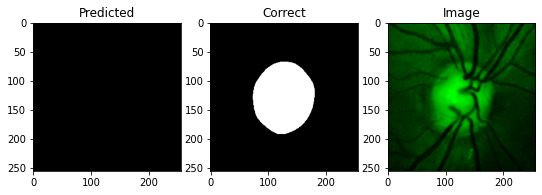

IOU: 0.15716552734375
Dice: 0.27163879951474235
image #37


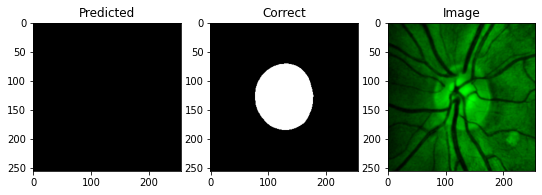

IOU: 0.1389923095703125
Dice: 0.2440618929600107
image #38


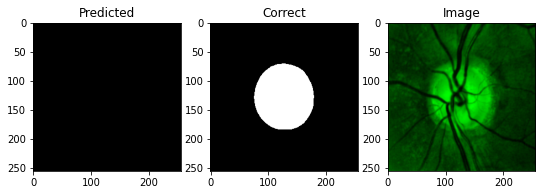

IOU: 0.1424713134765625
Dice: 0.24940899923871088
image #39


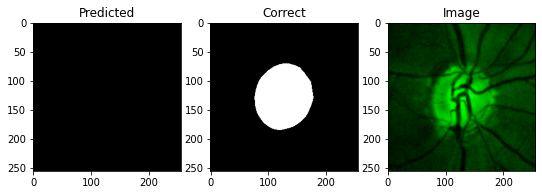

IOU: 0.13690185546875
Dice: 0.24083319911955764
image #40


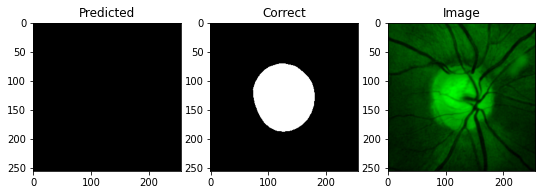

IOU: 0.1484832763671875
Dice: 0.25857281411508365
image #41


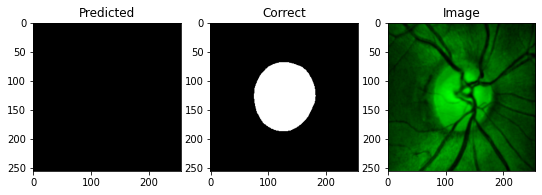

IOU: 0.1515960693359375
Dice: 0.2632799353394019
image #42


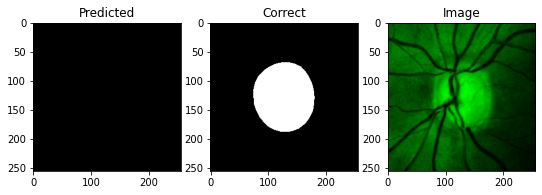

IOU: 0.153839111328125
Dice: 0.2666560871750112
image #43


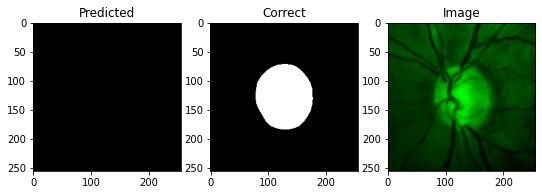

IOU: 0.134490966796875
Dice: 0.2370948217888366
image #44


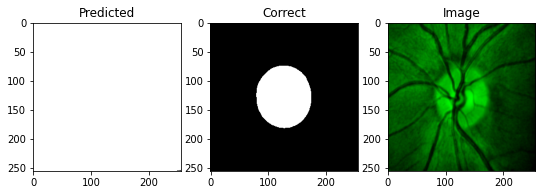

IOU: 0.12396227568387985
Dice: 0.22058084751055654
image #45


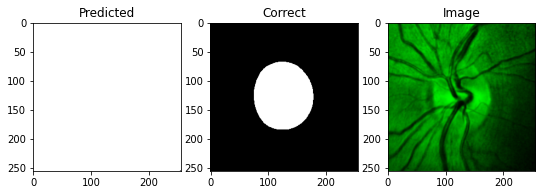

IOU: 0.14659565687179565
Dice: 0.2557059395004059
image #46


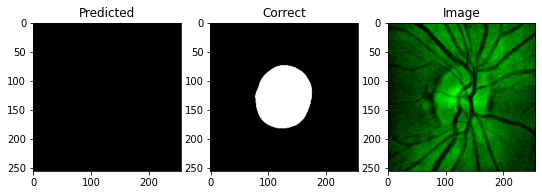

IOU: 0.1281585693359375
Dice: 0.22719956718739434
image #47


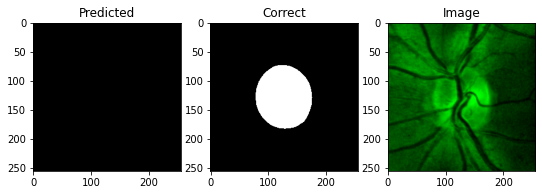

IOU: 0.128936767578125
Dice: 0.22842159327440326
image #48


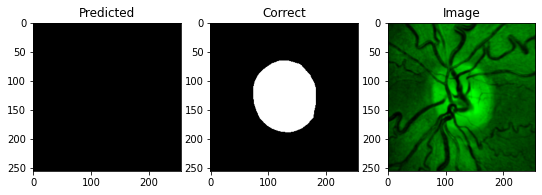

IOU: 0.1641845703125
Dice: 0.28205934780329245
image #49


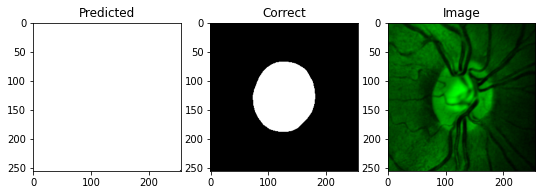

IOU: 0.15663863718509674
Dice: 0.2708514736536584
image #50


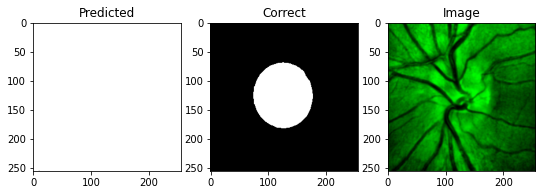

IOU: 0.13899442553520203
Dice: 0.24406516263865816


In [15]:
pred_iou, pred_dice, pred_disc = predict(green_channel_test, X_test, Z_test, model, img_size)

In [16]:
print(np.mean(pred_iou))
print(np.mean(pred_dice))

0.14455831
0.25225599094881


### Cálculo do CDR

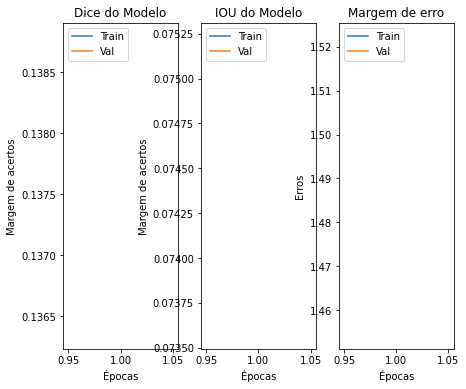

In [17]:
plot_results(history_cup, epochs)

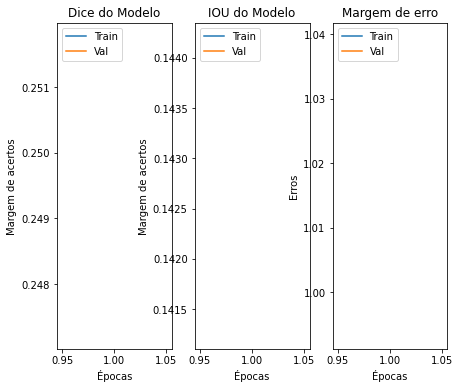

In [18]:
plot_results(history_disc, epochs)

In [19]:
result, diametros_cup, diametros_disc = create_table_result(pred_cup, pred_disc, test_idx)
pd.DataFrame(data= result)
pd.DataFrame(data={'cup': diametros_cup, 'disc': diametros_disc})

error: OpenCV(4.5.3) C:\Users\runneradmin\AppData\Local\Temp\pip-req-build-sn_xpupm\opencv\modules\imgproc\src\shapedescr.cpp:360: error: (-201:Incorrect size of input array) There should be at least 5 points to fit the ellipse in function 'cv::fitEllipseNoDirect'
